**Import data and count number of rows**

In [1]:
import csv
infile = open("nyc_data.csv", 'r')    # open the file for reading
cpt = 0;

reader = csv.reader(infile)
reader.next() #remove headers
data = []

for line in reader:                   # read through the CSV one line at a time
    cpt+=1
    data.append(line)
    
print "Number of pick-ups: ", cpt

Number of pick-ups:  846945


**Extract all hours and month of pick-ups**

In [6]:
from collections import Counter

months = []
hours = []
for d in data:
    datetime = d[5]
    date, time = datetime.split(" ")
    year, month, day = date.split("-")
    hour, minute, second = time.split(":")
    months.append(month)
    hours.append(hour)
    
histogram1 = Counter(months)
histogram2 = Counter(hours)

**Plot histogram of number of pick-ups according to month**

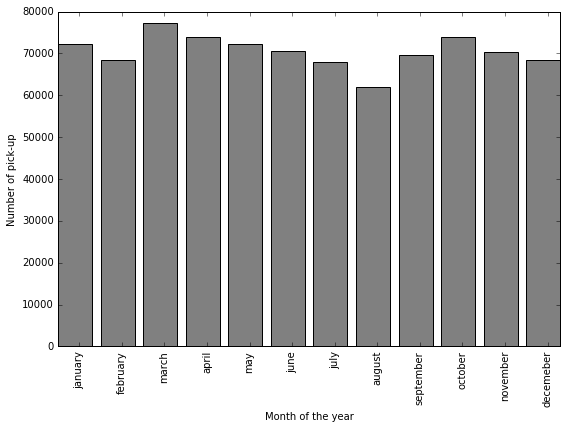

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

sorted_keys =[]
values = []

for key in sorted(histogram1):
    sorted_keys.append(key)
    values.append(histogram1[key])

pos = np.arange(len(sorted_keys))
width = 0.8     # gives histogram aspect to the bar diagram

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
labels=["january","february","march","april","may","june","july","august","september","october","november","decemeber"]
ax.set_xticklabels(labels)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Month of the year')

plt.bar(pos, values, width, color='0.5')
plt.show()

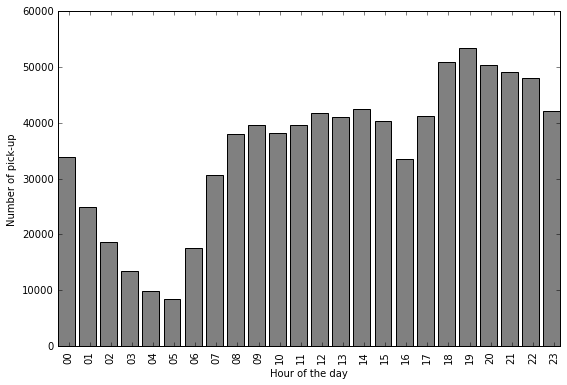

In [9]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

sorted_keys =[]
values = []

for key in sorted(histogram2):
    sorted_keys.append(key)
    values.append(histogram2[key])

pos = np.arange(len(sorted_keys))
width = 0.8     # gives histogram aspect to the bar diagram

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(sorted_keys)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], sorted_keys, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Hour of the day')

plt.bar(pos, values, width, color='0.5')
plt.show()

In [6]:
import geoplotlib
from geoplotlib.utils import BoundingBox
import numpy as np
from geoplotlib.utils import BoundingBox

geo_data_for_plotting = {"lat": [float(line[11]) for line in data],
                         "lon": [float(line[10]) for line in data]}

geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-4)
offset = 0.04
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox(north = np.mean(geo_data_for_plotting["lat"]) + offset, south = np.mean(geo_data_for_plotting["lat"]) - offset, east = np.mean(geo_data_for_plotting["lon"]) + offset, west = np.mean(geo_data_for_plotting["lon"])-offset))
geoplotlib.inline()

('smallest non-zero count', 2.3350257441172881e-06)
('max count:', 45.694651843658534)
